In [3]:
import numpy as np
import pandas as pd

# データの読み込み
data = np.load('data/data_raw_preprocessed/s01.npy')

# チャンネル名のリスト
channels = [
    'Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 
    'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz',
    'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz',
    'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2'
]

# データの形状を表示
print(f"データの形状: {data.shape}")  # (試行数, チャンネル数, 時間点)

# 最初の試行のデータをDataFrameに変換
trial_num = 0  # 表示したい試行番号（0-39）
time_points = 5  # 表示したい時間点の数

df = pd.DataFrame(
    data[trial_num, :, :time_points],  # 最初の数時間点のみ表示
    index=channels,
    columns=[f't_{i}' for i in range(time_points)]
)

print(f"\n試行 {trial_num + 1} の最初の {time_points} 時間点のデータ:")
print(df)

# 基本的な統計量も表示
print("\n基本統計量:")
print(df.describe())

データの形状: (40, 32, 8320)

試行 1 の最初の 5 時間点のデータ:
              t_0           t_1           t_2           t_3           t_4
Fp1 -1.169492e-06 -1.863196e-06 -2.929556e-06 -2.911041e-06  7.912813e-07
AF3 -3.627696e-06 -5.265707e-06 -6.701122e-06 -5.962562e-06 -1.001838e-06
F3   2.091462e-06 -1.822241e-07 -4.289611e-06 -9.407081e-06 -6.004869e-06
F7  -2.642589e-06 -4.936293e-06 -4.880778e-06 -2.956288e-06  1.170609e-06
FC5 -9.658379e-07 -3.784200e-06 -2.889590e-06  1.537992e-07  5.037112e-06
FC1  1.100848e-06 -1.435710e-06 -4.259638e-06 -6.869233e-06 -4.146346e-06
C3  -2.738771e-06 -8.651914e-06 -1.436300e-06 -5.050897e-06 -7.316075e-06
T7  -1.689603e-06 -3.493711e-06 -2.330241e-06 -1.694735e-06  1.309247e-06
CP5  5.504321e-06  5.120450e-06  5.581522e-06  7.587443e-06  8.731221e-06
CP1  5.866101e-07 -9.210702e-07  1.304989e-07 -5.786795e-07 -9.737485e-07
P3  -2.484539e-06 -2.495260e-06 -2.732084e-06 -5.483274e-06 -8.355785e-06
P7   2.466257e-06  2.906839e-06  4.184461e-06  4.564703e-06  3.8379

In [1]:
import numpy as np

# 2DCNNの特徴量を模擬したデータ (trials=2, bands=2, channels=3, views=2)
features = np.array([
    # Trial 1
    [[[1, 2],     # channel 1
      [3, 4],     # channel 2
      [5, 6]],    # channel 3
     
     [[7, 8],     # channel 1
      [9, 10],    # channel 2
      [11, 12]]], # channel 3
    
    # Trial 2
    [[[13, 14],   # channel 1
      [15, 16],   # channel 2
      [17, 18]],  # channel 3
      
     [[19, 20],   # channel 1
      [21, 22],   # channel 2
      [23, 24]]]  # channel 3
])

print("元の形状:", features.shape)  # (2, 2, 3, 2)

# 方法1: フラット化せずに直接log
log1 = np.log(features)
print("\n直接logを適用:")
print(log1)
print("形状:", log1.shape)

# 方法2: フラット化してからlog
log2 = np.log(features.reshape(-1)).reshape(features.shape)
print("\nフラット化してからlogを適用:")
print(log2)
print("形状:", log2.shape)

# 結果が同じかチェック
print("\n両者は同じ結果か:", np.allclose(log1, log2))  # True

# しかし、より複雑なデータ変換や、
# 特に統計量を使う場合は結果が異なる可能性があります

元の形状: (2, 2, 3, 2)

直接logを適用:
[[[[0.         0.69314718]
   [1.09861229 1.38629436]
   [1.60943791 1.79175947]]

  [[1.94591015 2.07944154]
   [2.19722458 2.30258509]
   [2.39789527 2.48490665]]]


 [[[2.56494936 2.63905733]
   [2.7080502  2.77258872]
   [2.83321334 2.89037176]]

  [[2.94443898 2.99573227]
   [3.04452244 3.09104245]
   [3.13549422 3.17805383]]]]
形状: (2, 2, 3, 2)

フラット化してからlogを適用:
[[[[0.         0.69314718]
   [1.09861229 1.38629436]
   [1.60943791 1.79175947]]

  [[1.94591015 2.07944154]
   [2.19722458 2.30258509]
   [2.39789527 2.48490665]]]


 [[[2.56494936 2.63905733]
   [2.7080502  2.77258872]
   [2.83321334 2.89037176]]

  [[2.94443898 2.99573227]
   [3.04452244 3.09104245]
   [3.13549422 3.17805383]]]]
形状: (2, 2, 3, 2)

両者は同じ結果か: True


TypeError: plot_topomap() got an unexpected keyword argument 'title'

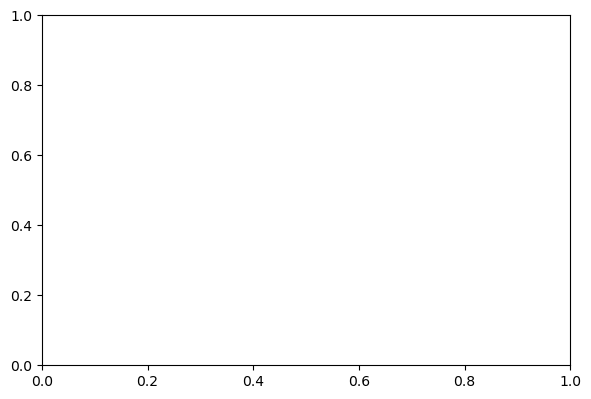

In [1]:
import numpy as np
import mne
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt
from feature_extraction import bandpower, FREQUENCY_BANDS
from load_data import load_deap_data_npy
import os

def visualize_bandpower_topomaps(eeg_data, labels, fs=128, window_sec=10, relative=False):
    """
    各トライアルのバンドパワーをトポマップで可視化
    
    Parameters:
    -----------
    eeg_data : numpy.ndarray
        形状: (trials, channels, time)
    labels : numpy.ndarray
        形状: (trials, 2) - [valence, arousal]
    """
    # チャンネル情報の設定
    ch_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz',
                'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz',
                'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
    
    # MNE info objectの作成
    info = mne.create_info(ch_names=ch_names, sfreq=fs, ch_types='eeg')
    montage = make_standard_montage('standard_1020')
    info.set_montage(montage)
    
    # 感情状態の閾値（中央値）
    valence_threshold = np.median(labels[:, 0])
    arousal_threshold = np.median(labels[:, 1])
    
    # 感情状態による条件分類
    high_valence = labels[:, 0] > valence_threshold
    high_arousal = labels[:, 1] > arousal_threshold
    
    conditions = {
        'High Valence': high_valence,
        'Low Valence': ~high_valence,
        'High Arousal': high_arousal,
        'Low Arousal': ~high_arousal
    }
    
    # 結果保存用ディレクトリ
    save_dir = './results/topomaps'
    os.makedirs(save_dir, exist_ok=True)
    
    # 各周波数帯域でのトポマップ作成
    for band_name, band_range in FREQUENCY_BANDS.items():
        plt.figure(figsize=(15, 10))
        
        for i, (cond_name, cond_mask) in enumerate(conditions.items(), 1):
            plt.subplot(2, 2, i)
            
            # 条件ごとのバンドパワー計算
            band_powers = np.zeros((len(ch_names),))
            for ch_idx in range(len(ch_names)):
                trial_powers = []
                for trial in eeg_data[cond_mask]:
                    power = bandpower(trial[ch_idx], fs, band_range, 
                                    window_sec=window_sec, relative=relative)
                    trial_powers.append(power)
                band_powers[ch_idx] = np.mean(trial_powers)
            
            # トポマップの描画
            mne.viz.plot_topomap(band_powers, info, show=False,
                                title=f'{band_name} - {cond_name}',
                                cmap='RdBu_r')
        
        plt.tight_layout()
        plt.savefig(os.path.join(save_dir, f'{band_name}_topomap.png'))
        plt.close()

# メイン処理
if __name__ == "__main__":
    # データの読み込み
    file_path = "data/data_raw_preprocessed/s01.npy"
    eeg_data, labels, _ = load_deap_data_npy(file_path, preprocessing='eeg')
    
    # トポマップの可視化
    visualize_bandpower_topomaps(eeg_data, labels)

In [2]:
import numpy as np
import mne
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt
from feature_extraction import bandpower, FREQUENCY_BANDS
from load_data import load_deap_data_npy
import os
import json
import pandas as pd

def analyze_bandpower_by_condition(eeg_data, labels, fs=128, window_sec=10, relative=False):
    """
    各条件でのバンドパワーを計算し、データを保存
    
    Parameters:
    -----------
    eeg_data : numpy.ndarray
        形状: (trials, channels, time)
    labels : numpy.ndarray
        形状: (trials, 2) - [valence, arousal]
        
    Returns:
    --------
    dict : 条件ごとのバンドパワーデータ
    """
    # チャンネル情報
    ch_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz',
                'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz',
                'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
    
    # 感情状態の閾値（中央値）
    valence_threshold = np.median(labels[:, 0])
    arousal_threshold = np.median(labels[:, 1])
    
    # 条件マスクの作成
    conditions = {
        'High_Valence': labels[:, 0] > valence_threshold,
        'Low_Valence': labels[:, 0] <= valence_threshold,
        'High_Arousal': labels[:, 1] > arousal_threshold,
        'Low_Arousal': labels[:, 1] <= arousal_threshold
    }
    
    # 結果保存用の辞書
    results = {
        'metadata': {
            'sampling_rate': fs,
            'window_sec': window_sec,
            'relative_power': relative,
            'n_channels': len(ch_names),
            'channel_names': ch_names,
            'frequency_bands': FREQUENCY_BANDS
        },
        'power_values': {}
    }
    
    # 各条件でのバンドパワー計算
    for cond_name, cond_mask in conditions.items():
        condition_data = {}
        
        for band_name, band_range in FREQUENCY_BANDS.items():
            # (チャンネル数, トライアル数) の配列を作成
            band_powers = np.zeros((len(ch_names), np.sum(cond_mask)))
            
            for ch_idx in range(len(ch_names)):
                for trial_idx, trial in enumerate(eeg_data[cond_mask]):
                    power = bandpower(trial[ch_idx], fs, band_range, 
                                    window_sec=window_sec, relative=relative)
                    band_powers[ch_idx, trial_idx] = power
            
            # 統計値の計算
            condition_data[band_name] = {
                'mean': band_powers.mean(axis=1).tolist(),
                'std': band_powers.std(axis=1).tolist(),
                'raw_values': band_powers.tolist(),
                'n_trials': band_powers.shape[1]
            }
        
        results['power_values'][cond_name] = condition_data
    
    return results

def save_results(results, save_dir='./results/bandpower_analysis'):
    """結果の保存"""
    os.makedirs(save_dir, exist_ok=True)
    
    # JSON形式で保存
    with open(os.path.join(save_dir, 'bandpower_results.json'), 'w') as f:
        json.dump(results, f, indent=4)
    
    # CSVファイルとしても保存（平均値）
    for band_name in FREQUENCY_BANDS.keys():
        data = {
            'Channel': results['metadata']['channel_names']
        }
        
        for condition in results['power_values'].keys():
            data[f'{condition}_mean'] = results['power_values'][condition][band_name]['mean']
            data[f'{condition}_std'] = results['power_values'][condition][band_name]['std']
        
        df = pd.DataFrame(data)
        df.to_csv(os.path.join(save_dir, f'{band_name}_summary.csv'), index=False)

# メイン処理
if __name__ == "__main__":
    # データの読み込み
    file_path = "data/data_raw_preprocessed/s01.npy"
    eeg_data, labels, _ = load_deap_data_npy(file_path, preprocessing='eeg')
    
    # バンドパワー解析
    results = analyze_bandpower_by_condition(eeg_data, labels)
    
    # 結果の保存
    save_results(results)

In [8]:
import numpy as np
import mne
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt
from feature_extraction import bandpower, FREQUENCY_BANDS
from load_data import load_deap_data_npy
import os
import json
import pandas as pd

def analyze_and_visualize_bandpower(eeg_data, labels, fs=128, window_sec=10, relative=False):
    """
    バンドパワーの解析とトポマップの可視化（ValenceとArousalを別々に）
    """
    # チャンネル情報
    ch_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz',
                'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz',
                'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
    
    info = mne.create_info(ch_names=ch_names, sfreq=fs, ch_types=['eeg'] * len(ch_names))
    montage = make_standard_montage('standard_1020')
    info.set_montage(montage, match_case=False)
    
    # 条件マスクの作成
    conditions = {
        'Valence': {f'V{i}': np.round(labels[:, 0]) == i for i in range(1, 10)},
        'Arousal': {f'A{i}': np.round(labels[:, 1]) == i for i in range(1, 10)}
    }
    
    # 結果保存用の設定
    results = {
        'metadata': {
            'sampling_rate': fs,
            'window_sec': window_sec,
            'relative_power': relative,
            'n_channels': len(ch_names),
            'channel_names': ch_names,
            'frequency_bands': FREQUENCY_BANDS
        },
        'power_values': {'Valence': {}, 'Arousal': {}}
    }
    
    save_dir = './results/bandpower_analysis'
    topomap_dir = os.path.join(save_dir, 'topomaps')
    os.makedirs(topomap_dir, exist_ok=True)
    
    # 各周波数帯域でのトポマップ作成
    for band_name, band_range in FREQUENCY_BANDS.items():
        # ValenceとArousalそれぞれについて
        for emotion_type in ['Valence', 'Arousal']:
            fig, axes = plt.subplots(3, 3, figsize=(20, 20))
            axes = axes.ravel()
            
            for i, (cond_name, cond_mask) in enumerate(conditions[emotion_type].items()):
                # トライアル数の確認
                n_trials = np.sum(cond_mask)
                if n_trials == 0:
                    print(f"Warning: No trials found for {emotion_type} {cond_name}")
                    axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center')
                    continue
                
                # バンドパワーの計算
                band_powers = np.zeros((len(ch_names), n_trials))
                for ch_idx in range(len(ch_names)):
                    for trial_idx, trial in enumerate(eeg_data[cond_mask]):
                        power = bandpower(trial[ch_idx], fs, band_range, 
                                        window_sec=window_sec, relative=relative)
                        band_powers[ch_idx, trial_idx] = power
                
                # 平均バンドパワーの計算
                mean_powers = np.mean(band_powers, axis=1)
                
                # トポマップの描画
                im, _ = mne.viz.plot_topomap(mean_powers, info, 
                                            axes=axes[i],
                                            show=False,
                                            size=2,
                                            extrapolate='box',
                                            sphere=(0.0, 0.0, 0.0, 0.09),
                                            names=ch_names,
                                            sensors=True)
                
                title = f'{cond_name}\n(n={n_trials})'
                axes[i].set_title(title)
                
                for text in axes[i].texts:
                    text.set_fontsize(8)
                
                # 数値データの保存
                if cond_name not in results['power_values'][emotion_type]:
                    results['power_values'][emotion_type][cond_name] = {}
                
                results['power_values'][emotion_type][cond_name][band_name] = {
                    'mean': mean_powers.tolist(),
                    'std': np.std(band_powers, axis=1).tolist(),
                    'raw_values': band_powers.tolist(),
                    'n_trials': n_trials
                }
            
            # カラーバーの追加
            if im is not None:
                cbar = plt.colorbar(im, ax=axes.tolist())
                cbar.set_label('Power')
            
            fig.suptitle(f'{band_name} - {emotion_type} Levels', fontsize=16, y=1.02)
            
            plt.tight_layout()
            plt.savefig(os.path.join(topomap_dir, f'{band_name}_{emotion_type.lower()}_topomap.png'), 
                       bbox_inches='tight', dpi=300)
            plt.close()
    
    return results

def save_results(results, save_dir='./results/bandpower_analysis'):
    """結果の保存"""
    os.makedirs(save_dir, exist_ok=True)
    
    # JSON形式で保存
    with open(os.path.join(save_dir, 'bandpower_results.json'), 'w') as f:
        json.dump(results, f, indent=4)
    
    # CSVファイルとしても保存（平均値）
    for band_name in FREQUENCY_BANDS.keys():
        data = {
            'Channel': results['metadata']['channel_names']
        }
        
        for condition in results['power_values'].keys():
            data[f'{condition}_mean'] = results['power_values'][condition][band_name]['mean']
            data[f'{condition}_std'] = results['power_values'][condition][band_name]['std']
        
        df = pd.DataFrame(data)
        df.to_csv(os.path.join(save_dir, f'{band_name}_summary.csv'), index=False)

# メイン処理
if __name__ == "__main__":
    # データの読み込み
    file_path = "data/data_raw_preprocessed/s01.npy"
    eeg_data, labels, _ = load_deap_data_npy(file_path, preprocessing='eeg')
    
    # バンドパワー解析とトポマップの可視化
    results = analyze_and_visualize_bandpower(eeg_data, labels)
    
    # 結果の保存
    save_results(results)

/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/945326108.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/945326108.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/945326108.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/945326108.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/945326108.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/945326108.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/945326108.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/945326108.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/945326108.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/945326108.py:108: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


TypeError: Object of type int64 is not JSON serializable

In [12]:
def analyze_and_visualize_bandpower(eeg_data, labels, fs=128, window_sec=10, relative=False, save_dir='./results/bandpower_analysis'):
    """
    バンドパワーの解析とトポマップの可視化（ValenceとArousalを別々に）
    
    Parameters:
    -----------
    save_dir : str
        結果を保存するディレクトリのパス
    """
    # チャンネル情報
    ch_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz',
                'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz',
                'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
    
    info = mne.create_info(ch_names=ch_names, sfreq=fs, ch_types=['eeg'] * len(ch_names))
    montage = make_standard_montage('standard_1020')
    info.set_montage(montage, match_case=False)
    
    # 条件マスクの作成
    conditions = {
        'Valence': {f'V{i}': np.round(labels[:, 0]) == i for i in range(1, 10)},
        'Arousal': {f'A{i}': np.round(labels[:, 1]) == i for i in range(1, 10)}
    }
    
    # 結果保存用の設定
    results = {
        'metadata': {
            'sampling_rate': fs,
            'window_sec': window_sec,
            'relative_power': relative,
            'n_channels': len(ch_names),
            'channel_names': ch_names,
            'frequency_bands': FREQUENCY_BANDS
        },
        'power_values': {'Valence': {}, 'Arousal': {}}
    }
    
    topomap_dir = os.path.join(save_dir, 'topomaps')
    os.makedirs(topomap_dir, exist_ok=True)
    
    # 各周波数帯域でのトポマップ作成
    for band_name, band_range in FREQUENCY_BANDS.items():
        # ValenceとArousalそれぞれについて
        for emotion_type in ['Valence', 'Arousal']:
            fig, axes = plt.subplots(3, 3, figsize=(20, 20))
            axes = axes.ravel()
            
            for i, (cond_name, cond_mask) in enumerate(conditions[emotion_type].items()):
                # トライアル数の確認
                n_trials = np.sum(cond_mask)
                if n_trials == 0:
                    print(f"Warning: No trials found for {emotion_type} {cond_name}")
                    axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center')
                    continue
                
                # バンドパワーの計算
                band_powers = np.zeros((len(ch_names), n_trials))
                for ch_idx in range(len(ch_names)):
                    for trial_idx, trial in enumerate(eeg_data[cond_mask]):
                        power = bandpower(trial[ch_idx], fs, band_range, 
                                        window_sec=window_sec, relative=relative)
                        band_powers[ch_idx, trial_idx] = power
                
                # 平均バンドパワーの計算
                mean_powers = np.mean(band_powers, axis=1)
                
                # トポマップの描画
                im, _ = mne.viz.plot_topomap(mean_powers, info, 
                                            axes=axes[i],
                                            show=False,
                                            size=2,
                                            extrapolate='box',
                                            sphere=(0.0, 0.0, 0.0, 0.09),
                                            names=ch_names,
                                            sensors=True)
                
                title = f'{cond_name}\n(n={n_trials})'
                axes[i].set_title(title)
                
                for text in axes[i].texts:
                    text.set_fontsize(8)
                
                # 数値データの保存
                if cond_name not in results['power_values'][emotion_type]:
                    results['power_values'][emotion_type][cond_name] = {}
                
                results['power_values'][emotion_type][cond_name][band_name] = {
                    'mean': mean_powers.tolist(),
                    'std': np.std(band_powers, axis=1).tolist(),
                    'raw_values': band_powers.tolist(),
                    'n_trials': n_trials
                }
            
            # カラーバーの追加
            if im is not None:
                cbar = plt.colorbar(im, ax=axes.tolist())
                cbar.set_label('Power')
            
            fig.suptitle(f'{band_name} - {emotion_type} Levels', fontsize=16, y=1.02)
            
            plt.tight_layout()
            plt.savefig(os.path.join(topomap_dir, f'{band_name}_{emotion_type.lower()}_topomap.png'), 
                       bbox_inches='tight', dpi=300)
            plt.close()
    
    return results
# メイン処理
if __name__ == "__main__":
    # データディレクトリの設定
    data_dir = "data/data_raw_preprocessed"
    n_subjects = 32
    
    # 全被験者の結果を保存するディレクトリ
    base_save_dir = './results/bandpower_analysis'
    os.makedirs(base_save_dir, exist_ok=True)
    
    # 全被験者のデータを処理
    all_results = {
        'individual': {},
        'average': {
            'Valence': {f'V{i}': {} for i in range(1, 10)},
            'Arousal': {f'A{i}': {} for i in range(1, 10)}
        }
    }
    
    # 被験者間の平均用データ集計
    subject_means = {
        'Valence': {f'V{i}': {} for i in range(1, 10)},
        'Arousal': {f'A{i}': {} for i in range(1, 10)}
    }
    
    # 各被験者のデータを処理
    for subject in range(1, n_subjects + 1):
        print(f"\nProcessing subject {subject}...")
        
        # データ読み込み
        file_path = os.path.join(data_dir, f"s{subject:02d}.npy")
        try:
            eeg_data, labels, _ = load_deap_data_npy(file_path, preprocessing='eeg')
        except Exception as e:
            print(f"Error loading data for subject {subject}: {e}")
            continue
        
        # 個別の分析実行
        subject_save_dir = os.path.join(base_save_dir, f's{subject:02d}')
        results = analyze_and_visualize_bandpower(
            eeg_data=eeg_data,
            labels=labels,
            save_dir=subject_save_dir
        )
        
        # 個別の結果を保存
        all_results['individual'][f's{subject:02d}'] = results
        
        # 被験者間平均用データの集計
        for emotion_type in ['Valence', 'Arousal']:
            for cond_name in results['power_values'][emotion_type]:
                for band_name in FREQUENCY_BANDS:
                    if band_name in results['power_values'][emotion_type][cond_name]:
                        data = results['power_values'][emotion_type][cond_name][band_name]
                        if data['n_trials'] > 0:  # トライアルが存在する場合のみ
                            if band_name not in subject_means[emotion_type][cond_name]:
                                subject_means[emotion_type][cond_name][band_name] = []
                            
                            # 被験者ごとの平均を保存
                            subject_means[emotion_type][cond_name][band_name].append(
                                np.array(data['mean'])
                            )
    
    # 被験者間の平均と標準偏差の計算
    print("\nCalculating cross-subject averages...")
    for emotion_type in ['Valence', 'Arousal']:
        for cond_name in subject_means[emotion_type]:
            for band_name in FREQUENCY_BANDS:
                if band_name in subject_means[emotion_type][cond_name]:
                    means = subject_means[emotion_type][cond_name][band_name]
                    if means:  # データが存在する場合
                        means_array = np.array(means)
                        grand_mean = np.mean(means_array, axis=0)
                        grand_std = np.std(means_array, axis=0)
                        n_subjects_with_data = len(means)
                        
                        all_results['average'][emotion_type][cond_name][band_name] = {
                            'mean': grand_mean.tolist(),
                            'std': grand_std.tolist(),
                            'n_subjects': n_subjects_with_data
                        }
    
    # 結果の保存
    print("\nSaving results...")
    with open(os.path.join(base_save_dir, 'all_subjects_results.json'), 'w') as f:
        json.dump(all_results, f, indent=4)
    
    # 平均のトポマップ作成
    print("\nCreating average topomaps...")
    visualize_average_topomaps(all_results['average'])
    
    print("Analysis complete!")


Processing subject 1...


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Processing subject 2...


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/1965877786.py:102: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


ValueError: non-broadcastable output operand with shape (32,1) doesn't match the broadcast shape (32,6)

In [16]:
import numpy as np
import mne
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt
from feature_extraction import bandpower, FREQUENCY_BANDS
from load_data import load_deap_data_npy
import os
import json

def analyze_and_visualize_bandpower(eeg_data, labels, fs=128, window_sec=10, relative=False, save_dir='./results/bandpower_analysis'):
    """
    バンドパワーの解析とトポマップの可視化（ValenceとArousalを別々に）
    
    Parameters:
    -----------
    eeg_data : numpy.ndarray
        EEGデータ
    labels : numpy.ndarray
        感情ラベル（ValenceとArousal）
    fs : int
        サンプリング周波数
    window_sec : int
        解析窓長（秒）
    relative : bool
        相対パワーを計算するかどうか
    save_dir : str
        結果を保存するディレクトリのパス
    """
    # チャンネル情報
    ch_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz',
                'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz',
                'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
    
    info = mne.create_info(ch_names=ch_names, sfreq=fs, ch_types=['eeg'] * len(ch_names))
    montage = make_standard_montage('standard_1020')
    info.set_montage(montage, match_case=False)
    
    # 条件マスクの作成
    conditions = {
        'Valence': {f'V{i}': np.round(labels[:, 0]) == i for i in range(1, 10)},
        'Arousal': {f'A{i}': np.round(labels[:, 1]) == i for i in range(1, 10)}
    }
    
    # 結果保存用の設定
    results = {
        'metadata': {
            'sampling_rate': fs,
            'window_sec': window_sec,
            'relative_power': relative,
            'n_channels': len(ch_names),
            'channel_names': ch_names,
            'frequency_bands': FREQUENCY_BANDS
        },
        'power_values': {'Valence': {}, 'Arousal': {}}
    }
    
    topomap_dir = os.path.join(save_dir, 'topomaps')
    os.makedirs(topomap_dir, exist_ok=True)
    
    # 各周波数帯域でのトポマップ作成
    for band_name, band_range in FREQUENCY_BANDS.items():
        # ValenceとArousalそれぞれについて
        for emotion_type in ['Valence', 'Arousal']:
            fig, axes = plt.subplots(3, 3, figsize=(20, 20))
            axes = axes.ravel()
            
            for i, (cond_name, cond_mask) in enumerate(conditions[emotion_type].items()):
                # トライアル数の確認
                n_trials = np.sum(cond_mask)
                if n_trials == 0:
                    print(f"Warning: No trials found for {emotion_type} {cond_name}")
                    axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center')
                    continue
                
                # バンドパワーの計算
                band_powers = np.zeros((len(ch_names), n_trials))
                for ch_idx in range(len(ch_names)):
                    for trial_idx, trial in enumerate(eeg_data[cond_mask]):
                        power = bandpower(trial[ch_idx], fs, band_range, 
                                        window_sec=window_sec, relative=relative)
                        band_powers[ch_idx, trial_idx] = power
                
                # 平均バンドパワーの計算
                mean_powers = np.mean(band_powers, axis=1)
                
                # トポマップの描画
                im, _ = mne.viz.plot_topomap(mean_powers, info, 
                                            axes=axes[i],
                                            show=False,
                                            size=2,
                                            extrapolate='box',
                                            sphere=(0.0, 0.0, 0.0, 0.09),
                                            names=ch_names,
                                            sensors=True)
                
                title = f'{cond_name}\n(n={n_trials})'
                axes[i].set_title(title)
                
                for text in axes[i].texts:
                    text.set_fontsize(8)
                
                # 数値データの保存
                if cond_name not in results['power_values'][emotion_type]:
                    results['power_values'][emotion_type][cond_name] = {}
                
                results['power_values'][emotion_type][cond_name][band_name] = {
                    'mean': mean_powers.tolist(),
                    'std': np.std(band_powers, axis=1).tolist(),
                    'n_trials': n_trials
                }
            
            # カラーバーの追加
            if im is not None:
                cbar = plt.colorbar(im, ax=axes.tolist())
                cbar.set_label('Power')
            
            fig.suptitle(f'{band_name} - {emotion_type} Levels', fontsize=16, y=1.02)
            
            plt.tight_layout()
            plt.savefig(os.path.join(topomap_dir, f'{band_name}_{emotion_type.lower()}_topomap.png'), 
                       bbox_inches='tight', dpi=300)
            plt.close()
    
    return results

def visualize_average_topomaps(average_results, save_dir='./results/bandpower_analysis/average_topomaps'):
    """
    被験者間平均のトポマップを作成
    
    Parameters:
    -----------
    average_results : dict
        被験者間平均の結果
    save_dir : str
        保存先ディレクトリ
    """
    ch_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz',
                'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz',
                'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
    
    info = mne.create_info(ch_names=ch_names, sfreq=128, ch_types=['eeg'] * len(ch_names))
    montage = make_standard_montage('standard_1020')
    info.set_montage(montage, match_case=False)
    
    os.makedirs(save_dir, exist_ok=True)
    
    for band_name in FREQUENCY_BANDS:
        for emotion_type in ['Valence', 'Arousal']:
            fig, axes = plt.subplots(3, 3, figsize=(20, 20))
            axes = axes.ravel()
            
            for i in range(9):
                cond_name = f'{emotion_type[0]}{i+1}'
                if (cond_name in average_results[emotion_type] and 
                    band_name in average_results[emotion_type][cond_name]):
                    
                    data = average_results[emotion_type][cond_name][band_name]
                    mean_powers = np.array(data['mean'])
                    n_subjects = data['n_subjects']
                    
                    if n_subjects > 0:
                        im, _ = mne.viz.plot_topomap(mean_powers, info, 
                                                    axes=axes[i],
                                                    show=False,
                                                    size=2,
                                                    extrapolate='box',
                                                    sphere=(0.0, 0.0, 0.0, 0.09),
                                                    names=ch_names,
                                                    sensors=True)
                        
                        title = f'{cond_name}\n(n={n_subjects} subjects)'
                        axes[i].set_title(title)
                        
                        for text in axes[i].texts:
                            text.set_fontsize(8)
                    else:
                        axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center')
            
            #if im is not None:
                #cbar = plt.colorbar(im, ax=axes.tolist())
                #cbar.set_label('Power')
            
            fig.suptitle(f'{band_name} - Average {emotion_type} Levels\nAcross Subjects', 
                        fontsize=16, y=1.02)
            
            plt.tight_layout()
            plt.savefig(os.path.join(save_dir, f'{band_name}_{emotion_type.lower()}_average_topomap.png'), 
                       bbox_inches='tight', dpi=300)
            plt.close()
            
# 結果の保存前にNumPy型を通常のPython型に変換する関数を追加
def convert_to_serializable(obj):
    """
    NumPy型をJSON保存可能な通常のPython型に変換
    """
    if isinstance(obj, dict):
        return {key: convert_to_serializable(value) for key, value in obj.items()}
    elif isinstance(obj, list):
        return [convert_to_serializable(item) for item in list]
    elif isinstance(obj, np.integer):
        return int(obj)
    elif isinstance(obj, np.floating):
        return float(obj)
    elif isinstance(obj, np.ndarray):
        return obj.tolist()
    else:
        return obj

# メイン処理
if __name__ == "__main__":
    # データディレクトリの設定
    data_dir = "data/data_raw_preprocessed"
    n_subjects = 1
    
    # 全被験者の結果を保存するディレクトリ
    base_save_dir = './results/bandpower_analysis'
    os.makedirs(base_save_dir, exist_ok=True)
    
    # 全被験者のデータを処理
    all_results = {
        'individual': {},
        'average': {
            'Valence': {f'V{i}': {} for i in range(1, 10)},
            'Arousal': {f'A{i}': {} for i in range(1, 10)}
        }
    }
    
    # 被験者間の平均用データ集計
    subject_means = {
        'Valence': {f'V{i}': {} for i in range(1, 10)},
        'Arousal': {f'A{i}': {} for i in range(1, 10)}
    }
    
    # 各被験者のデータを処理
    for subject in range(1, n_subjects + 1):
        print(f"\nProcessing subject {subject}...")
        
        # データ読み込み
        file_path = os.path.join(data_dir, f"s{subject:02d}.npy")
        try:
            eeg_data, labels, _ = load_deap_data_npy(file_path, preprocessing='eeg')
        except Exception as e:
            print(f"Error loading data for subject {subject}: {e}")
            continue
        
        # 個別の分析実行
        subject_save_dir = os.path.join(base_save_dir, f's{subject:02d}')
        results = analyze_and_visualize_bandpower(
            eeg_data=eeg_data,
            labels=labels,
            save_dir=subject_save_dir
        )
        
        # 個別の結果を保存
        all_results['individual'][f's{subject:02d}'] = results
        
        # 被験者間平均用データの集計
        for emotion_type in ['Valence', 'Arousal']:
            for cond_name in results['power_values'][emotion_type]:
                for band_name in FREQUENCY_BANDS:
                    if band_name in results['power_values'][emotion_type][cond_name]:
                        data = results['power_values'][emotion_type][cond_name][band_name]
                        if data['n_trials'] > 0:  # トライアルが存在する場合のみ
                            if band_name not in subject_means[emotion_type][cond_name]:
                                subject_means[emotion_type][cond_name][band_name] = []
                            
                            # 被験者ごとの平均を保存
                            subject_means[emotion_type][cond_name][band_name].append(
                                np.array(data['mean'])
                            )
    
    # 被験者間の平均と標準偏差の計算
    print("\nCalculating cross-subject averages...")
    for emotion_type in ['Valence', 'Arousal']:
        for cond_name in subject_means[emotion_type]:
            for band_name in FREQUENCY_BANDS:
                if band_name in subject_means[emotion_type][cond_name]:
                    means = subject_means[emotion_type][cond_name][band_name]
                    if means:  # データが存在する場合
                        means_array = np.array(means)
                        grand_mean = np.mean(means_array, axis=0)
                        grand_std = np.std(means_array, axis=0)
                        n_subjects_with_data = len(means)
                        
                        all_results['average'][emotion_type][cond_name][band_name] = {
                            'mean': grand_mean.tolist(),
                            'std': grand_std.tolist(),
                            'n_subjects': n_subjects_with_data
                        }
    
    # 結果の保存
    print("\nSaving results...")
    serializable_results = convert_to_serializable(all_results)
    with open(os.path.join(base_save_dir, 'all_subjects_results.json'), 'w') as f:
        json.dump(serializable_results, f, indent=4)
    
    # 平均のトポマップ作成
    print("\nCreating average topomaps...")
    visualize_average_topomaps(all_results['average'])
    
    print("Analysis complete!")


Processing subject 1...


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3693423365.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3693423365.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3693423365.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3693423365.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3693423365.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3693423365.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3693423365.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3693423365.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3693423365.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3693423365.py:120: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Calculating cross-subject averages...

Saving results...


TypeError: 'type' object is not iterable

In [19]:
import numpy as np
import mne
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt
from feature_extraction import bandpower, FREQUENCY_BANDS
from load_data import load_deap_data_npy
import os
import json

def create_emotion_masks(labels, verbose=True):
    """
    感情ラベルからマスクを作成し、各レベルのトライアル数を表示
    """
    conditions = {
        'Valence': {},
        'Arousal': {}
    }
    
    if verbose:
        print("\nLabel distribution:")
        print("Valence scores:", np.round(labels[:, 0]))
        print("Arousal scores:", np.round(labels[:, 1]))
    
    # Valenceのマスク作成
    for i in range(1, 10):
        mask = np.round(labels[:, 0]) == i
        conditions['Valence'][f'V{i}'] = mask
        if verbose:
            n_trials = np.sum(mask)
            print(f"Valence {i}: {n_trials} trials")
    
    # Arousalのマスク作成
    for i in range(1, 10):
        mask = np.round(labels[:, 1]) == i
        conditions['Arousal'][f'A{i}'] = mask
        if verbose:
            n_trials = np.sum(mask)
            print(f"Arousal {i}: {n_trials} trials")
    
    return conditions

def create_topomap_figure(emotion_type, band_name):
    """トポマップ用の図を作成"""
    fig = plt.figure(figsize=(20, 20))
    gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.4)
    axes = []
    for i in range(3):
        for j in range(3):
            ax = fig.add_subplot(gs[i, j])
            axes.append(ax)
    
    fig.suptitle(f'{band_name} - {emotion_type} Levels', 
                 fontsize=16, y=1.02)
    return fig, axes

def analyze_and_visualize_bandpower(eeg_data, labels, fs=128, window_sec=10, relative=False, save_dir='./results/bandpower_analysis'):
    """バンドパワーの解析とトポマップの可視化"""
    
    # チャンネル情報
    ch_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz',
                'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz',
                'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
    
    info = mne.create_info(ch_names=ch_names, sfreq=fs, ch_types=['eeg'] * len(ch_names))
    montage = make_standard_montage('standard_1020')
    info.set_montage(montage, match_case=False)
    
    # 条件マスクの作成（詳細表示付き）
    conditions = create_emotion_masks(labels, verbose=True)
    
    # 結果保存用の設定
    results = {
        'metadata': {
            'sampling_rate': fs,
            'window_sec': window_sec,
            'relative_power': relative,
            'n_channels': len(ch_names),
            'channel_names': ch_names,
            'frequency_bands': FREQUENCY_BANDS
        },
        'power_values': {'Valence': {}, 'Arousal': {}}
    }
    
    topomap_dir = os.path.join(save_dir, 'topomaps')
    os.makedirs(topomap_dir, exist_ok=True)
    
    # 各周波数帯域でのトポマップ作成
    for band_name, band_range in FREQUENCY_BANDS.items():
        for emotion_type in ['Valence', 'Arousal']:
            fig, axes = create_topomap_figure(emotion_type, band_name)
            
            for i, (cond_name, cond_mask) in enumerate(conditions[emotion_type].items()):
                n_trials = np.sum(cond_mask)
                if n_trials == 0:
                    print(f"Warning: No trials found for {emotion_type} {cond_name}")
                    axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center')
                    continue
                
                # バンドパワーの計算
                band_powers = np.zeros((len(ch_names), n_trials))
                for ch_idx in range(len(ch_names)):
                    for trial_idx, trial in enumerate(eeg_data[cond_mask]):
                        power = bandpower(trial[ch_idx], fs, band_range, 
                                        window_sec=window_sec, relative=relative)
                        band_powers[ch_idx, trial_idx] = power
                
                # 平均バンドパワーの計算
                mean_powers = np.mean(band_powers, axis=1)
                std_powers = np.std(band_powers, axis=1)
                
                # トポマップの描画
                im, _ = mne.viz.plot_topomap(mean_powers, info, 
                                           axes=axes[i],
                                           show=False,
                                           size=2,
                                           extrapolate='box',
                                           sphere=(0.0, 0.0, 0.0, 0.09),
                                           names=ch_names,
                                           sensors=True)
                
                title = f'{cond_name}\n(n={n_trials})'
                axes[i].set_title(title)
                
                for text in axes[i].texts:
                    text.set_fontsize(8)
                
                # 数値データの保存
                if cond_name not in results['power_values'][emotion_type]:
                    results['power_values'][emotion_type][cond_name] = {}
                
                results['power_values'][emotion_type][cond_name][band_name] = {
                    'mean': mean_powers.tolist(),
                    'std': std_powers.tolist(),
                    'n_trials': int(n_trials)  # numpyのint64を通常のintに変換
                }
            plt.tight_layout()
            
            plt.savefig(os.path.join(topomap_dir, f'{band_name}_{emotion_type.lower()}_topomap.png'), 
                       bbox_inches='tight', dpi=300)
            plt.close()
    
    return results

def visualize_average_topomaps(average_results, save_dir='./results/bandpower_analysis/average_topomaps'):
    """被験者間平均のトポマップを作成"""
    
    ch_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz',
                'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz',
                'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
    
    info = mne.create_info(ch_names=ch_names, sfreq=128, ch_types=['eeg'] * len(ch_names))
    montage = make_standard_montage('standard_1020')
    info.set_montage(montage, match_case=False)
    
    os.makedirs(save_dir, exist_ok=True)
    
    for band_name in FREQUENCY_BANDS:
        for emotion_type in ['Valence', 'Arousal']:
            fig, axes = create_topomap_figure(emotion_type, band_name)
            im = None
            
            for i in range(9):
                cond_name = f'{emotion_type[0]}{i+1}'
                if (cond_name in average_results[emotion_type] and 
                    band_name in average_results[emotion_type][cond_name]):
                    
                    data = average_results[emotion_type][cond_name][band_name]
                    mean_powers = np.array(data['mean'])
                    n_subjects = data['n_subjects']
                    
                    if n_subjects > 0:
                        im, _ = mne.viz.plot_topomap(mean_powers, info, 
                                                   axes=axes[i],
                                                   show=False,
                                                   size=2,
                                                   extrapolate='box',
                                                   sphere=(0.0, 0.0, 0.0, 0.09),
                                                   names=ch_names,
                                                   sensors=True)
                        
                        title = f'{cond_name}\n(n={n_subjects} subjects)'
                        axes[i].set_title(title)
                        
                        for text in axes[i].texts:
                            text.set_fontsize(8)
                    else:
                        axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center')
            
            plt.tight_layout()
            plt.savefig(os.path.join(save_dir, f'{band_name}_{emotion_type.lower()}_average_topomap.png'), 
                       bbox_inches='tight', dpi=300)
            plt.close()

class NumpyEncoder(json.JSONEncoder):
    """NumPy型をJSON保存可能な型に変換するエンコーダー"""
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NumpyEncoder, self).default(obj)

if __name__ == "__main__":
    # データディレクトリの設定
    data_dir = "data/data_raw_preprocessed"
    n_subjects = 2  # 被験者数を32に修正
    
    # 全被験者の結果を保存するディレクトリ
    base_save_dir = './results/bandpower_analysis'
    os.makedirs(base_save_dir, exist_ok=True)
    
    # 全被験者のデータを処理
    all_results = {
        'individual': {},
        'average': {
            'Valence': {f'V{i}': {} for i in range(1, 10)},
            'Arousal': {f'A{i}': {} for i in range(1, 10)}
        }
    }
    
    # 被験者間の平均用データ集計
    subject_means = {
        'Valence': {f'V{i}': {} for i in range(1, 10)},
        'Arousal': {f'A{i}': {} for i in range(1, 10)}
    }
    
    # 各被験者のデータを処理
    for subject in range(1, n_subjects + 1):
        print(f"\nProcessing subject {subject}...")
        
        file_path = os.path.join(data_dir, f"s{subject:02d}.npy")
        try:
            eeg_data, labels, _ = load_deap_data_npy(file_path, preprocessing='eeg')
        except Exception as e:
            print(f"Error loading data for subject {subject}: {e}")
            continue
        
        subject_save_dir = os.path.join(base_save_dir, f's{subject:02d}')
        results = analyze_and_visualize_bandpower(
            eeg_data=eeg_data,
            labels=labels,
            save_dir=subject_save_dir
        )
        
        all_results['individual'][f's{subject:02d}'] = results
        
        # 被験者間平均用データの集計
        for emotion_type in ['Valence', 'Arousal']:
            for cond_name in results['power_values'][emotion_type]:
                for band_name in FREQUENCY_BANDS:
                    if band_name in results['power_values'][emotion_type][cond_name]:
                        data = results['power_values'][emotion_type][cond_name][band_name]
                        if data['n_trials'] > 0:
                            if band_name not in subject_means[emotion_type][cond_name]:
                                subject_means[emotion_type][cond_name][band_name] = []
                            
                            subject_means[emotion_type][cond_name][band_name].append(
                                np.array(data['mean'])
                            )
    
    # 被験者間の平均と標準偏差の計算
    print("\nCalculating cross-subject averages...")
    for emotion_type in ['Valence', 'Arousal']:
        for cond_name in subject_means[emotion_type]:
            for band_name in FREQUENCY_BANDS:
                if band_name in subject_means[emotion_type][cond_name]:
                    means = subject_means[emotion_type][cond_name][band_name]
                    if means:
                        means_array = np.array(means)
                        grand_mean = np.mean(means_array, axis=0)
                        grand_std = np.std(means_array, axis=0)
                        n_subjects_with_data = len(means)
                        
                        all_results['average'][emotion_type][cond_name][band_name] = {
                            'mean': grand_mean.tolist(),
                            'std': grand_std.tolist(),
                            'n_subjects': n_subjects_with_data
                        }
    
    # 結果の保存
    print("\nSaving results...")
    with open(os.path.join(base_save_dir, 'all_subjects_results.json'), 'w') as f:
        json.dump(all_results, f, indent=4, cls=NumpyEncoder)
    
    # 平均のトポマップ作成
    print("\nCreating average topomaps...")
    visualize_average_topomaps(all_results['average'])
    
    print("Analysis complete!")


Processing subject 1...

Label distribution:
Valence scores: [7. 7. 5. 7. 8. 3. 5. 3. 2. 4. 8. 2. 2. 7. 3. 2. 3. 2. 4. 7. 3. 2. 1. 8.
 7. 2. 3. 7. 9. 4. 7. 9. 3. 2. 7. 8. 9. 8. 4. 7.]
Arousal scores: [4. 7. 6. 7. 8. 8. 7. 6. 3. 4. 4. 5. 8. 2. 8. 7. 7. 7. 2. 7. 2. 3. 2. 8.
 4. 8. 3. 7. 7. 3. 3. 8. 7. 7. 8. 7. 8. 3. 3. 7.]
Valence 1: 1 trials
Valence 2: 8 trials
Valence 3: 7 trials
Valence 4: 4 trials
Valence 5: 2 trials
Valence 6: 0 trials
Valence 7: 10 trials
Valence 8: 5 trials
Valence 9: 3 trials
Arousal 1: 0 trials
Arousal 2: 4 trials
Arousal 3: 7 trials
Arousal 4: 4 trials
Arousal 5: 1 trials
Arousal 6: 2 trials
Arousal 7: 13 trials
Arousal 8: 9 trials
Arousal 9: 0 trials


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Processing subject 2...

Label distribution:
Valence scores: [5. 9. 2. 4. 1. 1. 2. 5. 7. 3. 9. 8. 4. 1. 5. 5. 9. 9. 9. 8. 7. 6. 9. 9.
 1. 9. 9. 1. 6. 9. 1. 5. 5. 9. 9. 5. 9. 5. 5. 6.]
Arousal scores: [5. 3. 2. 7. 9. 9. 7. 8. 9. 7. 9. 6. 5. 8. 2. 5. 8. 6. 9. 7. 1. 1. 8. 9.
 3. 5. 9. 1. 7. 7. 1. 1. 3. 5. 8. 1. 9. 1. 1. 5.]
Valence 1: 6 trials
Valence 2: 2 trials
Valence 3: 1 trials
Valence 4: 2 trials
Valence 5: 9 trials
Valence 6: 3 trials
Valence 7: 2 trials
Valence 8: 2 trials
Valence 9: 13 trials
Arousal 1: 8 trials
Arousal 2: 2 trials
Arousal 3: 3 trials
Arousal 4: 0 trials
Arousal 5: 6 trials
Arousal 6: 2 trials
Arousal 7: 6 trials
Arousal 8: 5 trials
Arousal 9: 8 trials


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:137: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Calculating cross-subject averages...

Saving results...

Creating average topomaps...


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:191: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3779462074.py:191: UserWarning: This figure includes Axes that 

Analysis complete!



Processing subject 1...

Label distribution:
Valence scores: [7. 7. 5. 7. 8. 3. 5. 3. 2. 4. 8. 2. 2. 7. 3. 2. 3. 2. 4. 7. 3. 2. 1. 8.
 7. 2. 3. 7. 9. 4. 7. 9. 3. 2. 7. 8. 9. 8. 4. 7.]
Arousal scores: [4. 7. 6. 7. 8. 8. 7. 6. 3. 4. 4. 5. 8. 2. 8. 7. 7. 7. 2. 7. 2. 3. 2. 8.
 4. 8. 3. 7. 7. 3. 3. 8. 7. 7. 8. 7. 8. 3. 3. 7.]
Valence 1: 1 trials
Valence 2: 8 trials
Valence 3: 7 trials
Valence 4: 4 trials
Valence 5: 2 trials
Valence 6: 0 trials
Valence 7: 10 trials
Valence 8: 5 trials
Valence 9: 3 trials
Arousal 1: 0 trials
Arousal 2: 4 trials
Arousal 3: 7 trials
Arousal 4: 4 trials
Arousal 5: 1 trials
Arousal 6: 2 trials
Arousal 7: 13 trials
Arousal 8: 9 trials
Arousal 9: 0 trials


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Processing subject 2...

Label distribution:
Valence scores: [5. 9. 2. 4. 1. 1. 2. 5. 7. 3. 9. 8. 4. 1. 5. 5. 9. 9. 9. 8. 7. 6. 9. 9.
 1. 9. 9. 1. 6. 9. 1. 5. 5. 9. 9. 5. 9. 5. 5. 6.]
Arousal scores: [5. 3. 2. 7. 9. 9. 7. 8. 9. 7. 9. 6. 5. 8. 2. 5. 8. 6. 9. 7. 1. 1. 8. 9.
 3. 5. 9. 1. 7. 7. 1. 1. 3. 5. 8. 1. 9. 1. 1. 5.]
Valence 1: 6 trials
Valence 2: 2 trials
Valence 3: 1 trials
Valence 4: 2 trials
Valence 5: 9 trials
Valence 6: 3 trials
Valence 7: 2 trials
Valence 8: 2 trials
Valence 9: 13 trials
Arousal 1: 8 trials
Arousal 2: 2 trials
Arousal 3: 3 trials
Arousal 4: 0 trials
Arousal 5: 6 trials
Arousal 6: 2 trials
Arousal 7: 6 trials
Arousal 8: 5 trials
Arousal 9: 8 trials


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Processing subject 3...

Label distribution:
Valence scores: [7. 7. 3. 5. 5. 7. 5. 5. 4. 4. 7. 7. 5. 5. 4. 7. 8. 7. 5. 8. 4. 8. 5. 6.
 3. 7. 6. 5. 5. 5. 5. 7. 4. 7. 4. 5. 4. 6. 3. 8.]
Arousal scores: [4. 2. 1. 1. 4. 2. 5. 1. 4. 4. 4. 4. 6. 6. 6. 3. 3. 4. 6. 3. 3. 3. 4. 3.
 5. 4. 3. 6. 4. 8. 2. 3. 5. 3. 4. 3. 2. 3. 2. 3.]
Valence 1: 0 trials
Valence 2: 0 trials
Valence 3: 3 trials
Valence 4: 7 trials
Valence 5: 13 trials
Valence 6: 3 trials
Valence 7: 10 trials
Valence 8: 4 trials
Valence 9: 0 trials
Arousal 1: 3 trials
Arousal 2: 5 trials
Arousal 3: 12 trials
Arousal 4: 11 trials
Arousal 5: 3 trials
Arousal 6: 5 trials
Arousal 7: 0 trials
Arousal 8: 1 trials
Arousal 9: 0 trials


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Processing subject 4...

Label distribution:
Valence scores: [8. 3. 7. 5. 3. 3. 6. 5. 2. 7. 2. 6. 4. 6. 7. 7. 2. 9. 7. 2. 2. 2. 1. 3.
 3. 6. 2. 7. 2. 2. 2. 4. 7. 6. 4. 1. 3. 2. 5. 1.]
Arousal scores: [8. 3. 7. 5. 4. 2. 4. 3. 3. 6. 2. 4. 3. 5. 6. 7. 3. 8. 7. 2. 2. 2. 1. 3.
 5. 6. 5. 5. 7. 3. 2. 5. 6. 4. 5. 2. 3. 3. 3. 6.]
Valence 1: 3 trials
Valence 2: 11 trials
Valence 3: 6 trials
Valence 4: 3 trials
Valence 5: 3 trials
Valence 6: 5 trials
Valence 7: 7 trials
Valence 8: 1 trials
Valence 9: 1 trials
Arousal 1: 1 trials
Arousal 2: 7 trials
Arousal 3: 10 trials
Arousal 4: 4 trials
Arousal 5: 7 trials
Arousal 6: 5 trials
Arousal 7: 4 trials
Arousal 8: 2 trials
Arousal 9: 0 trials


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Processing subject 5...

Label distribution:
Valence scores: [7. 7. 2. 8. 6. 8. 9. 9. 2. 5. 7. 1. 7. 7. 8. 3. 7. 5. 4. 6. 5. 8. 4. 3.
 4. 5. 7. 7. 7. 3. 6. 4. 5. 5. 7. 7. 8. 8. 1. 1.]
Arousal scores: [7. 4. 7. 3. 5. 5. 6. 9. 4. 7. 2. 4. 3. 5. 4. 4. 6. 3. 5. 7. 9. 5. 3. 8.
 3. 9. 2. 4. 6. 4. 5. 4. 8. 5. 8. 5. 6. 7. 5. 7.]
Valence 1: 3 trials
Valence 2: 2 trials
Valence 3: 3 trials
Valence 4: 4 trials
Valence 5: 6 trials
Valence 6: 3 trials
Valence 7: 11 trials
Valence 8: 6 trials
Valence 9: 2 trials
Arousal 1: 0 trials
Arousal 2: 2 trials
Arousal 3: 5 trials
Arousal 4: 8 trials
Arousal 5: 9 trials
Arousal 6: 4 trials
Arousal 7: 6 trials
Arousal 8: 3 trials
Arousal 9: 3 trials


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()
/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Processing subject 6...

Label distribution:
Valence scores: [4. 7. 4. 5. 7. 5. 8. 8. 6. 5. 7. 7. 5. 5. 6. 6. 6. 3. 5. 4. 7. 6. 7. 7.
 8. 8. 5. 3. 7. 8. 7. 8. 7. 8. 4. 7. 8. 7. 8. 4.]
Arousal scores: [3. 7. 6. 3. 4. 2. 6. 8. 4. 3. 4. 5. 6. 7. 5. 3. 6. 4. 3. 4. 6. 4. 7. 3.
 4. 5. 5. 4. 6. 6. 6. 7. 4. 3. 5. 4. 4. 3. 4. 6.]
Valence 1: 0 trials
Valence 2: 0 trials
Valence 3: 2 trials
Valence 4: 5 trials
Valence 5: 7 trials
Valence 6: 5 trials
Valence 7: 12 trials
Valence 8: 9 trials
Valence 9: 0 trials
Arousal 1: 0 trials
Arousal 2: 1 trials
Arousal 3: 8 trials
Arousal 4: 12 trials
Arousal 5: 5 trials
Arousal 6: 9 trials
Arousal 7: 4 trials
Arousal 8: 1 trials
Arousal 9: 0 trials


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Processing subject 7...

Label distribution:
Valence scores: [7. 6. 3. 7. 7. 7. 2. 4. 5. 7. 5. 3. 7. 5. 7. 3. 7. 8. 7. 7. 7. 7. 8. 7.
 7. 3. 7. 8. 3. 5. 5. 8. 7. 7. 7. 2. 7. 8. 2. 3.]
Arousal scores: [2. 3. 6. 3. 4. 5. 4. 7. 7. 6. 7. 3. 3. 7. 6. 2. 4. 3. 6. 7. 6. 7. 6. 7.
 7. 6. 7. 4. 3. 8. 7. 3. 5. 7. 7. 7. 4. 9. 2. 5.]
Valence 1: 0 trials
Valence 2: 3 trials
Valence 3: 6 trials
Valence 4: 1 trials
Valence 5: 5 trials
Valence 6: 1 trials
Valence 7: 19 trials
Valence 8: 5 trials
Valence 9: 0 trials
Arousal 1: 0 trials
Arousal 2: 3 trials
Arousal 3: 7 trials
Arousal 4: 5 trials
Arousal 5: 3 trials
Arousal 6: 7 trials
Arousal 7: 13 trials
Arousal 8: 1 trials
Arousal 9: 1 trials


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Processing subject 8...

Label distribution:
Valence scores: [4. 5. 9. 6. 1. 8. 5. 4. 7. 9. 7. 4. 7. 8. 5. 4. 3. 4. 1. 3. 5. 8. 5. 4.
 8. 7. 4. 5. 4. 5. 7. 5. 5. 5. 8. 1. 5. 7. 4. 8.]
Arousal scores: [6. 7. 7. 8. 3. 5. 5. 4. 8. 6. 4. 5. 5. 5. 5. 5. 5. 7. 7. 3. 5. 7. 6. 6.
 5. 4. 8. 6. 5. 3. 7. 5. 3. 4. 7. 8. 7. 5. 4. 7.]
Valence 1: 3 trials
Valence 2: 0 trials
Valence 3: 2 trials
Valence 4: 9 trials
Valence 5: 11 trials
Valence 6: 1 trials
Valence 7: 6 trials
Valence 8: 6 trials
Valence 9: 2 trials
Arousal 1: 0 trials
Arousal 2: 0 trials
Arousal 3: 4 trials
Arousal 4: 5 trials
Arousal 5: 13 trials
Arousal 6: 5 trials
Arousal 7: 9 trials
Arousal 8: 4 trials
Arousal 9: 0 trials


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()



Processing subject 9...

Label distribution:
Valence scores: [5. 6. 5. 4. 7. 3. 6. 4. 5. 3. 4. 4. 5. 7. 6. 5. 5. 7. 4. 7. 5. 5. 4. 5.
 3. 3. 7. 6. 5. 4. 4. 7. 3. 3. 8. 6. 3. 6. 4. 3.]
Arousal scores: [4. 4. 5. 4. 6. 6. 6. 5. 5. 6. 4. 6. 5. 7. 6. 5. 4. 6. 4. 7. 5. 6. 4. 5.
 7. 6. 7. 6. 5. 4. 4. 6. 7. 6. 7. 6. 6. 5. 4. 4.]
Valence 1: 0 trials
Valence 2: 0 trials
Valence 3: 8 trials
Valence 4: 9 trials
Valence 5: 10 trials
Valence 6: 6 trials
Valence 7: 6 trials
Valence 8: 1 trials
Valence 9: 0 trials
Arousal 1: 0 trials
Arousal 2: 0 trials
Arousal 3: 0 trials
Arousal 4: 11 trials
Arousal 5: 9 trials
Arousal 6: 14 trials
Arousal 7: 6 trials
Arousal 8: 0 trials
Arousal 9: 0 trials


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_43642/3362538243.py:138: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


KeyboardInterrupt: 

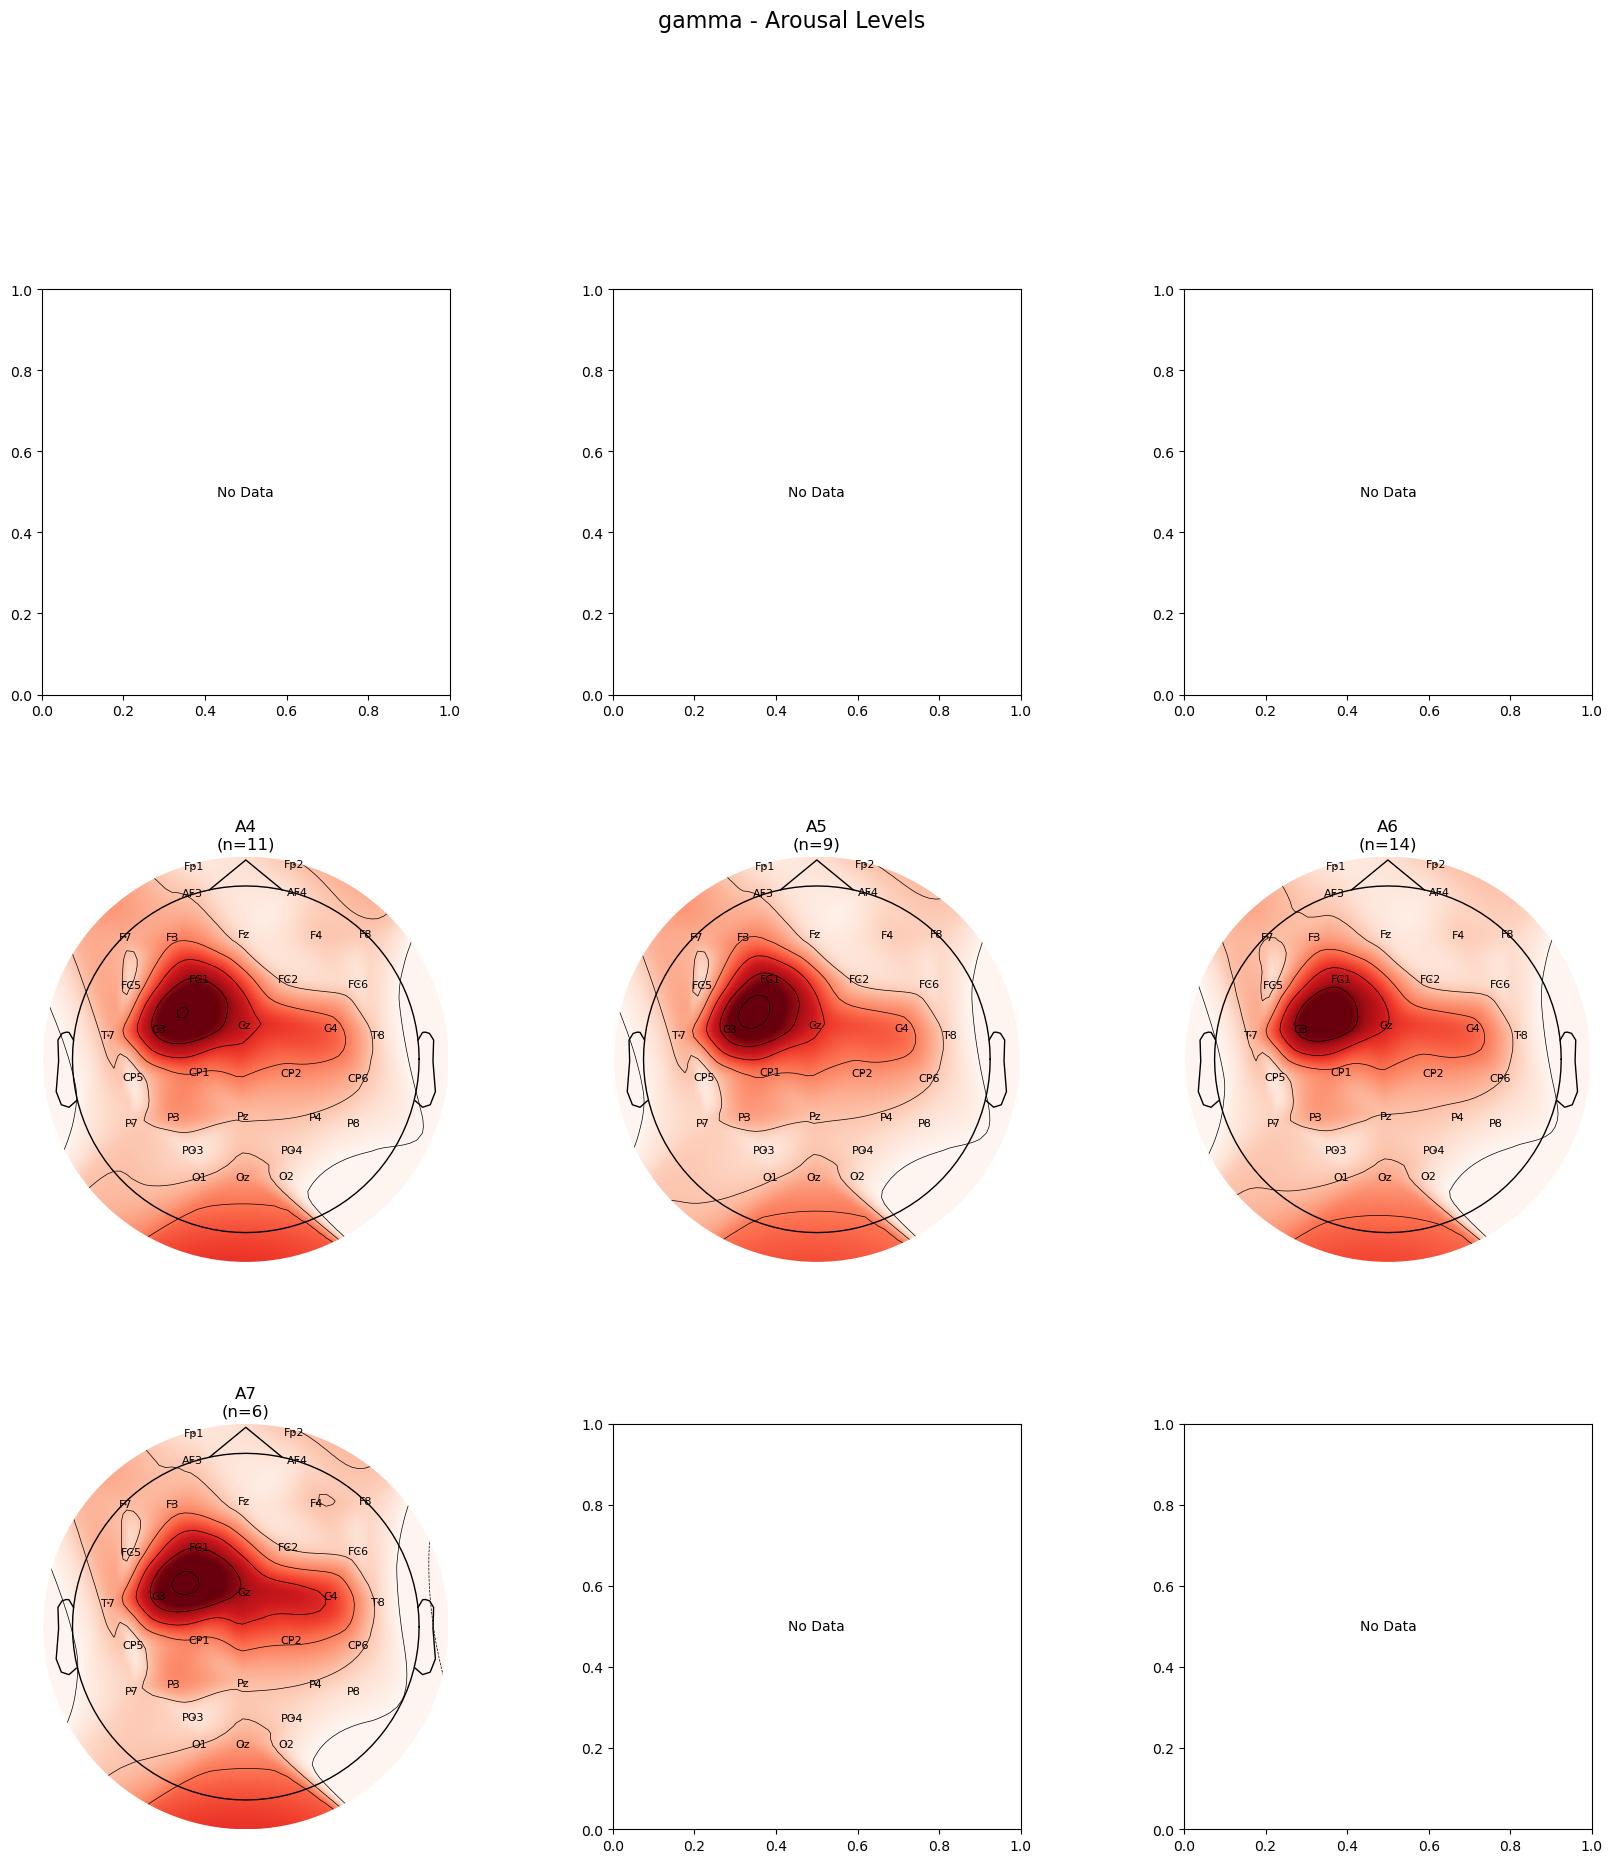

In [26]:
import numpy as np
import mne
from mne.channels import make_standard_montage
import matplotlib.pyplot as plt
from feature_extraction import bandpower, FREQUENCY_BANDS
from load_data import load_deap_data_npy
import os
import json

def create_emotion_masks(labels, verbose=True):
    """
    感情ラベルからマスクを作成し、各レベルのトライアル数を表示
    """
    conditions = {
        'Valence': {},
        'Arousal': {}
    }
    
    if verbose:
        print("\nLabel distribution:")
        print("Valence scores:", np.round(labels[:, 0]))
        print("Arousal scores:", np.round(labels[:, 1]))
    
    # Valenceのマスク作成
    for i in range(1, 10):
        mask = np.round(labels[:, 0]) == i
        conditions['Valence'][f'V{i}'] = mask
        if verbose:
            n_trials = np.sum(mask)
            print(f"Valence {i}: {n_trials} trials")
    
    # Arousalのマスク作成
    for i in range(1, 10):
        mask = np.round(labels[:, 1]) == i
        conditions['Arousal'][f'A{i}'] = mask
        if verbose:
            n_trials = np.sum(mask)
            print(f"Arousal {i}: {n_trials} trials")
    
    return conditions

def create_topomap_figure(emotion_type, band_name):
    """トポマップ用の図を作成"""
    fig = plt.figure(figsize=(20, 20))
    gs = fig.add_gridspec(3, 3, hspace=0.4, wspace=0.4)
    axes = []
    for i in range(3):
        for j in range(3):
            ax = fig.add_subplot(gs[i, j])
            axes.append(ax)
    
    fig.suptitle(f'{band_name} - {emotion_type} Levels', 
                 fontsize=16, y=1.02)
    return fig, axes

def analyze_and_visualize_bandpower(eeg_data, labels, fs=128, window_sec=10, relative=False, save_dir='./results/bandpower_analysis'):
    """バンドパワーの解析とトポマップの可視化"""
    
    # チャンネル情報
    ch_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz',
                'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz',
                'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
    
    info = mne.create_info(ch_names=ch_names, sfreq=fs, ch_types=['eeg'] * len(ch_names))
    montage = make_standard_montage('standard_1020')
    info.set_montage(montage, match_case=False)
    
    # 条件マスクの作成（詳細表示付き）
    conditions = create_emotion_masks(labels, verbose=True)
    
    # 結果保存用の設定
    results = {
        'metadata': {
            'sampling_rate': fs,
            'window_sec': window_sec,
            'relative_power': relative,
            'n_channels': len(ch_names),
            'channel_names': ch_names,
            'frequency_bands': FREQUENCY_BANDS
        },
        'power_values': {'Valence': {}, 'Arousal': {}}
    }
    
    topomap_dir = os.path.join(save_dir, 'topomaps')
    os.makedirs(topomap_dir, exist_ok=True)
    # 各周波数帯域でのトポマップ作成
    for band_name, band_range in FREQUENCY_BANDS.items():
        for emotion_type in ['Valence', 'Arousal']:
            fig, axes = create_topomap_figure(emotion_type, band_name)
            
            for i, (cond_name, cond_mask) in enumerate(conditions[emotion_type].items()):
                n_trials = np.sum(cond_mask)
                if n_trials == 0:
                    print(f"Warning: No trials found for {emotion_type} {cond_name}")
                    axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center')
                    continue
                
                # バンドパワーの計算
                band_powers = np.zeros((len(ch_names), n_trials))
                for ch_idx in range(len(ch_names)):
                    for trial_idx, trial in enumerate(eeg_data[cond_mask]):
                        power = bandpower(trial[ch_idx], 128, band_range, 
                                        window_sec=window_sec, relative=True)
                        band_powers[ch_idx, trial_idx] = power
                
                # 平均バンドパワーの計算
                mean_powers = np.mean(band_powers, axis=1)
                std_powers = np.std(band_powers, axis=1)
                
                # トポマップの描画
                im, _ = mne.viz.plot_topomap(mean_powers, info, 
                                           axes=axes[i],
                                           show=False,
                                           size=2,
                                           extrapolate='box',
                                           sphere=(0.0, 0.0, 0.0, 0.09),
                                           names=ch_names,
                                           sensors=True)
                
                title = f'{cond_name}\n(n={n_trials})'
                axes[i].set_title(title)
                
                for text in axes[i].texts:
                    text.set_fontsize(8)
                
                # 数値データの保存
                if cond_name not in results['power_values'][emotion_type]:
                    results['power_values'][emotion_type][cond_name] = {}
                
                results['power_values'][emotion_type][cond_name][band_name] = {
                    'mean': mean_powers.tolist(),
                    'std': std_powers.tolist(),
                    'n_trials': int(n_trials),
                    'raw_powers': band_powers.tolist()  # 全トライアルのデータを保存
                }
            
            plt.tight_layout()
            plt.savefig(os.path.join(topomap_dir, f'{band_name}_{emotion_type.lower()}_topomap.png'), 
                       bbox_inches='tight', dpi=300)
            plt.close()
    
    return results

def visualize_average_topomaps(average_results, save_dir='./results/bandpower_analysis/average_topomaps'):
    """被験者間平均のトポマップを作成"""
    
    ch_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz',
                'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz',
                'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
    
    info = mne.create_info(ch_names=ch_names, sfreq=128, ch_types=['eeg'] * len(ch_names))
    montage = make_standard_montage('standard_1020')
    info.set_montage(montage, match_case=False)
    
    os.makedirs(save_dir, exist_ok=True)
    for band_name in FREQUENCY_BANDS:
        for emotion_type in ['Valence', 'Arousal']:
            fig, axes = create_topomap_figure(emotion_type, band_name)
            
            for i in range(9):
                cond_name = f'{emotion_type[0]}{i+1}'
                if (cond_name in average_results[emotion_type] and 
                    band_name in average_results[emotion_type][cond_name]):
                    
                    data = average_results[emotion_type][cond_name][band_name]
                    mean_powers = np.array(data['mean'])
                    n_trials = data['n_trials']
                    
                    if n_trials > 0:
                        im, _ = mne.viz.plot_topomap(mean_powers, info, 
                                                   axes=axes[i],
                                                   show=False,
                                                   size=2,
                                                   extrapolate='box',
                                                   sphere=(0.0, 0.0, 0.0, 0.09),
                                                   names=ch_names,
                                                   sensors=True)
                        
                        title = f'{cond_name}\n(n={n_trials} trials)'
                        axes[i].set_title(title)
                        
                        for text in axes[i].texts:
                            text.set_fontsize(8)
                    else:
                        axes[i].text(0.5, 0.5, 'No Data', ha='center', va='center')
            
            plt.tight_layout()
            plt.savefig(os.path.join(save_dir, f'{band_name}_{emotion_type.lower()}_average_topomap.png'), 
                       bbox_inches='tight', dpi=300)
            plt.close()

class NumpyEncoder(json.JSONEncoder):
    """NumPy型をJSON保存可能な型に変換するエンコーダー"""
    def default(self, obj):
        if isinstance(obj, np.integer):
            return int(obj)
        elif isinstance(obj, np.floating):
            return float(obj)
        elif isinstance(obj, np.ndarray):
            return obj.tolist()
        return super(NumpyEncoder, self).default(obj)

if __name__ == "__main__":
    # データディレクトリの設定
    data_dir = "data/data_preprocessed_python"
    n_subjects = 32
    
    # 全被験者の結果を保存するディレクトリ
    base_save_dir = './results/bandpower_analysis'
    os.makedirs(base_save_dir, exist_ok=True)
    
    # 全トライアルのデータを集めるための辞書
    all_trials_data = {
        'Valence': {f'V{i}': {band: [] for band in FREQUENCY_BANDS} for i in range(1, 10)},
        'Arousal': {f'A{i}': {band: [] for band in FREQUENCY_BANDS} for i in range(1, 10)}
    }
    # チャンネル情報
    ch_names = ['Fp1', 'AF3', 'F3', 'F7', 'FC5', 'FC1', 'C3', 'T7', 
                'CP5', 'CP1', 'P3', 'P7', 'PO3', 'O1', 'Oz', 'Pz',
                'Fp2', 'AF4', 'Fz', 'F4', 'F8', 'FC6', 'FC2', 'Cz',
                'C4', 'T8', 'CP6', 'CP2', 'P4', 'P8', 'PO4', 'O2']
    
    # 各被験者のデータを処理
    for subject in range(1, n_subjects + 1):
        print(f"\nProcessing subject {subject}...")
        
        file_path = os.path.join(data_dir, f"s{subject:02d}.npy")
        try:
            eeg_data, labels, _ = load_deap_data_npy(file_path, preprocessing='eeg')
        except Exception as e:
            print(f"Error loading data for subject {subject}: {e}")
            continue
        
        # 個別の被験者の結果を保存
        subject_save_dir = os.path.join(base_save_dir, f's{subject:02d}')
        results = analyze_and_visualize_bandpower(
            eeg_data=eeg_data,
            labels=labels,
            save_dir=subject_save_dir
        )
        
        # 条件マスクの作成
        conditions = create_emotion_masks(labels, verbose=False)
        
        # 各感情レベルとバンドについて、全トライアルのパワー値を収集
        for emotion_type in ['Valence', 'Arousal']:
            for i in range(1, 10):
                cond_name = f'{emotion_type[0]}{i}'
                cond_mask = conditions[emotion_type][cond_name]
                
                if np.sum(cond_mask) > 0:
                    trials_data = eeg_data[cond_mask]
                    
                    for band_name, band_range in FREQUENCY_BANDS.items():
                        for trial in trials_data:
                            powers = []
                            for ch_idx in range(len(ch_names)):
                                power = bandpower(trial[ch_idx], 128, band_range, 
                                                window_sec=10, relative=True)
                                powers.append(power)
                            all_trials_data[emotion_type][cond_name][band_name].append(powers)
    
    # 全トライアルの平均を計算
    print("\nCalculating averages across all trials...")
    all_results = {
        'average': {
            'Valence': {f'V{i}': {} for i in range(1, 10)},
            'Arousal': {f'A{i}': {} for i in range(1, 10)}
        }
    }
    
    for emotion_type in ['Valence', 'Arousal']:
        for cond_name in all_trials_data[emotion_type]:
            for band_name in FREQUENCY_BANDS:
                trials = all_trials_data[emotion_type][cond_name][band_name]
                if trials:
                    trials_array = np.array(trials)
                    mean_powers = np.mean(trials_array, axis=0)
                    std_powers = np.std(trials_array, axis=0)
                    n_trials = len(trials)
                    
                    all_results['average'][emotion_type][cond_name][band_name] = {
                        'mean': mean_powers.tolist(),
                        'std': std_powers.tolist(),
                        'n_trials': n_trials
                    }
    
    # 結果の保存
    print("\nSaving results...")
    with open(os.path.join(base_save_dir, 'all_trials_results.json'), 'w') as f:
        json.dump(all_results, f, indent=4, cls=NumpyEncoder)
    
    # 平均のトポマップ作成
    print("\nCreating average topomaps...")
    visualize_average_topomaps(all_results['average'])
    
    print("Analysis complete!")

In [9]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, optimizers
import numpy as np
def create_model(input_shape, sigma):
    inputs = layers.Input(shape=input_shape)
    
    # ConvLSTM2Dレイヤー
    x = layers.ConvLSTM2D(
        32, kernel_size=(2, 2),
        padding='same',
        return_sequences=True,
        activation='tanh',
        kernel_regularizer=regularizers.l2(0.005),
        recurrent_dropout=0.3
    )(inputs)
    #x = layers.BatchNormalization()(x)
    x = layers.MaxPooling3D(pool_size=(1, 1, 2))(x)
    
    x = layers.ConvLSTM2D(
        64, kernel_size=(2, 2),
        padding='same',
        return_sequences=False,  # 最後のタイムステップの出力のみを取得
        activation='tanh',
        kernel_regularizer=regularizers.l2(0.005),
        recurrent_dropout=0.3
    )(x)
    #x = layers.BatchNormalization()(x)
    x = layers.MaxPooling2D(pool_size=(1, 2))(x)
    
    # 特徴の平坦化
    x = layers.Flatten()(x)
    
    # Dense層
    
    x = layers.Dense(128, activation='tanh',
                    kernel_regularizer=regularizers.l2(0.005))(x)
    #x = layers.BatchNormalization()(x)
    x = layers.Dropout(0.4)(x)
    
    output = layers.Dense(1)(x)
    
    model = models.Model(inputs=inputs, outputs=output)
    return model

model = create_model(input_shape=(11, 5, 32, 1), sigma=0.25)
model.summary()

Model: "functional_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_7 (InputLayer)      │ (None, 11, 5, 32, 1)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_4 (ConvLSTM2D)      │ (None, 11, 5, 32, 32)  │        17,024 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling3d_2 (MaxPooling3D)  │ (None, 11, 5, 16, 32)  │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm2d_5 (ConvLSTM2D)      │ (None, 5, 16, 64)      │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_12 (MaxPooling2D) │ (None, 5, 8, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_7 (Flatten)             │ (None, 2560)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 128)            │       327,808 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_12 (Dropout)            │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │           129 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 443,521 (1.69 MB)

 Trainable params: 443,521 (1.69 MB)

 Non-trainable params: 0 (0.00 B)

In [5]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers, models, regularizers, optimizers

def create_model(input_shape):
    inputs = layers.Input(shape=input_shape)
    
    # Conv部分
    x = layers.ConvLSTM1D(32, 3, padding='same', 
                         kernel_regularizer=regularizers.l2(0.01),
                         return_sequences=True
                         )(inputs)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    #x = layers.Dropout(0.1)(x)
    #x = layers.MaxPooling3D((1,1,2))(x)
    # Conv部分
    x = layers.ConvLSTM1D(64, 4, padding='same', 
                         kernel_regularizer=regularizers.l2(0.01),

                         )(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    #x = layers.Dropout(0.1)(x)
    #x = layers.MaxPooling2D((1,2))(x)

    x = layers.Flatten()(x)
    
    # Dense部分
    x = layers.Dense(128, 
                     kernel_regularizer=regularizers.l2(0.01)
                     )(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(0.1)(x)
    
    x = layers.Dense(64, 
                     kernel_regularizer=regularizers.l2(0.01)
                     )(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation('relu')(x)
    x = layers.Dropout(0.1)(x)
    
    output = layers.Dense(1)(x)
    
    model = models.Model(inputs=inputs, outputs=output)
    model.compile(
        optimizer=optimizers.Adam(learning_rate=1e-4),
        loss='mse'
    )
    
    return model

model = create_model(input_shape=(11, 70, 1))
model.summary()

Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 11, 70, 1)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_1 (ConvLSTM1D)      │ (None, 11, 70, 32)     │        12,800 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_7           │ (None, 11, 70, 32)     │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_7 (Activation)       │ (None, 11, 70, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv_lstm1d_2 (ConvLSTM1D)      │ (None, 70, 64)         │        98,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_8           │ (None, 70, 64)         │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_8 (Activation)       │ (None, 70, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 4480)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 128)            │       573,568 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_9           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_9 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_5 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_10          │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_10 (Activation)      │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_6 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 694,401 (2.65 MB)

 Trainable params: 693,825 (2.65 MB)

 Non-trainable params: 576 (2.25 KB)

In [4]:
import os
import sys
import mne
import time
import pickle
import argparse
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib
matplotlib.use('Agg')
from mne.preprocessing import ICA, create_eog_epochs
from tqdm import tqdm

# パスの設定
root_folder = ''
ratings_csv_path = os.path.join(os.getcwd(), 'metadata_csv', 'participant_ratings.csv')
DEAP_EEG_channels_xlsx_path = os.path.join(os.getcwd(), 'metadata_csv', 'DEAP_EEG_channels.xlsx')
N_trials = 40
N_EEG_electrodes = 32
N_ICA = N_EEG_electrodes - 1

# フォルダ作成
ICA_components_folder = os.path.join(os.getcwd(), 'results', 'ICA_components')
ICA_models_folder = os.path.join(os.getcwd(), 'results', 'ICA_models')
PSD_folder = os.path.join(os.getcwd(), 'results', 'PSD')
waveforms_folder = os.path.join(os.getcwd(), 'results', 'waveforms')
mneraw_as_pkl_folder = os.path.join(os.getcwd(), 'results', 'pkl')
npy_folder = os.path.join(os.getcwd(), 'results', 'npy')

for folder in [ICA_components_folder, ICA_models_folder, PSD_folder, 
               waveforms_folder, mneraw_as_pkl_folder, npy_folder]:
    if not os.path.exists(folder):
        os.makedirs(folder, exist_ok=True)

def plot_data_stages(raw_orig, raw_filtered, epochs_clean, epochs_downsampled, subject_id, events):
    """
    4段階のデータ処理状態を可視化（最初の試行の1分間）
    """
    print(raw_orig.info['sfreq'])
    print(raw_filtered.info['sfreq'])
    print(epochs_clean.info['sfreq'])
    print(epochs_downsampled.info['sfreq'])
    ylim = (-20, 20)
    # 最初の試行の開始時点を取得
    first_trial_start = events[0][0] / raw_orig.info['sfreq']  # 秒単位
    duration = 60  # 1分間表示
    channel = ['Fp1','Fp2']  # 1チャンネルのみ表示
    
    fig, axes = plt.subplots(4, 1, figsize=(20, 16), sharex=True)
    
    # 生データ
    start_idx = int(first_trial_start * raw_orig.info['sfreq'])
    end_idx = start_idx + int(duration * raw_orig.info['sfreq'])

    raw_data_plot = raw_orig.copy().pick_channels([channel])
    data, times = raw_data_plot.get_data(start=start_idx, stop=end_idx, return_times=True)
    data = data * 1e6  # μVに変換
    axes[0].plot(times, data.T)
    axes[0].set_title('Raw Data')
    axes[0].set_ylabel('Amplitude (μV)')
    
    
    # フィルタ後
    filtered_data_plot = raw_filtered.copy().pick_channels([channel])
    data, times = filtered_data_plot.get_data(start=start_idx, stop=end_idx, return_times=True)
    data = data * 1e6  # μVに変換
    axes[1].plot(times, data.T)
    axes[1].set_title('After Filtering (4-45 Hz)')
    axes[1].set_ylabel('Amplitude (μV)')
    axes[1].grid(True)
    axes[1].set_ylim(ylim)
    
    # ICA処理後
    clean_data_array = epochs_clean.get_data()
    epoch_start_idx = int(abs(epochs_clean.tmin) * epochs_clean.info['sfreq'])
    epoch_duration_idx = int(duration * epochs_clean.info['sfreq'])
    ch_idx = epochs_clean.ch_names.index(channel)
    
    clean_times = np.linspace(first_trial_start, first_trial_start + duration, epoch_duration_idx)
    clean_data = clean_data_array[0, ch_idx:ch_idx+1, epoch_start_idx:epoch_start_idx+epoch_duration_idx]
    clean_data = clean_data * 1e6  # μVに変換
    axes[2].plot(clean_times, clean_data.T)
    axes[2].set_title('After ICA Cleaning')
    axes[2].set_ylabel('Amplitude (μV)')
    axes[2].grid(True)
    axes[2].set_ylim(ylim)
    
    # ダウンサンプリング後
    down_data_array = epochs_downsampled.get_data()
    down_start_idx = int(abs(epochs_downsampled.tmin) * epochs_downsampled.info['sfreq'])
    down_duration_idx = int(duration * epochs_downsampled.info['sfreq'])
    down_ch_idx = epochs_downsampled.ch_names.index(channel)
    
    down_times = np.linspace(first_trial_start, first_trial_start + duration, down_duration_idx)
    down_data = down_data_array[0, down_ch_idx:down_ch_idx+1, down_start_idx:down_start_idx+down_duration_idx]
    down_data = down_data * 1e6  # μVに変換
    axes[3].plot(down_times, down_data.T)
    axes[3].set_title('After Downsampling (128 Hz)')
    axes[3].set_ylabel('Amplitude (μV)')
    axes[3].set_xlabel('Time (s)')
    axes[3].grid(True)
    axes[3].set_ylim(ylim)

    plt.tight_layout()
    plt.savefig(os.path.join(waveforms_folder, f's{subject_id:02}_processing_stages.png'), 
                dpi=300, bbox_inches='tight')
    plt.close()

def clean_bdf(subject_id):
    try:
        # 既に処理済みかチェック
        npy_path = os.path.join(npy_folder, f's{subject_id:02}.npy')
        if os.path.exists(npy_path):
            print(f'\nFile has already been preprocessed.\nSkipping EEG .bdf preprocessing for Subject {subject_id:02}')
            return 0

        print(f'\nCleaning data for Subject {subject_id:02}')

        # データ読み込み
        bdf_file_path = os.path.join(root_folder, f's{subject_id:02d}.bdf')
        raw = mne.io.read_raw_bdf(bdf_file_path, preload=True, verbose=False).load_data()
        
        # チャンネル選択
        ch_names = raw.ch_names
        eeg_channels = ch_names[:N_EEG_electrodes]
        stim_ch_name = ch_names[-1]

        # 刺激チャンネルの分離
        raw_copy = raw.copy()
        raw_stim = raw_copy.pick_channels([stim_ch_name])
        raw.pick_channels(eeg_channels)

        # モンタージュ設定
        biosemi_montage = mne.channels.make_standard_montage(kind='biosemi32', head_size=0.095)
        raw.set_montage(biosemi_montage)

        # オリジナルデータの保存
        raw_orig = raw.copy()
        raw_orig.set_eeg_reference()

        # フィルタリング用のコピーを作成
        raw_filtered = raw.copy()
        raw_filtered.filter(4, 45, fir_design='firwin', n_jobs=-1)
        raw_filtered.notch_filter(np.arange(50, 251, 50), n_jobs=-1, fir_design='firwin')
        raw_filtered.set_eeg_reference()
        
        # イベント処理
        events = mne.find_events(raw_stim, stim_channel=stim_ch_name, verbose=True)
        if subject_id > 23:
            events[:,2] -= 1703680
            events[:,2] = events[:,2] % 65536

        # エポック作成
        inds_new_trial = np.where(events[:,2] == 4)[0]
        events_new_trial = events[inds_new_trial,:]
        epochs_no_baseline = mne.Epochs(raw, events_new_trial, event_id=4, 
                                      tmin=-5.0, tmax=60.0, 
                                      picks=eeg_channels,
                                      baseline=None,
                                      preload=True)

        # ICA処理
        ica = ICA(n_components=N_ICA, method='fastica', random_state=23)
        ica.fit(epochs_no_baseline)

        # EOGアーチファクトの自動検出
        eog_indices, eog_scores = ica.find_bads_eog(epochs_no_baseline, 
                                                   ch_name=['Fp1', 'Fp2'],
                                                   threshold=3)
        
        # EMGアーティファクト検出
        muscle_idx, muscle_scores = ica.find_bads_muscle(epochs_no_baseline,
                                                        threshold=0.9)

        ica.exclude = list(set(eog_indices) | set(muscle_idx))

        # ICAの可視化と保存
        fig_scores = ica.plot_scores(eog_scores, exclude=eog_indices, show=False)
        fig_scores.savefig(os.path.join(ICA_components_folder, f's{subject_id:02}_EOG_scores.png'))
        plt.close(fig_scores)

        fig_muscle_scores = ica.plot_scores(muscle_scores, exclude=muscle_idx, show=False)
        fig_muscle_scores.savefig(os.path.join(ICA_components_folder, f's{subject_id:02}_EMG_scores.png'))
        plt.close(fig_muscle_scores)

        # ICAの適用
        epochs_clean = ica.apply(epochs_no_baseline.copy())

        # ダウンサンプリング
        epochs_clean_downsampled = epochs_clean.copy().resample(sfreq=128.0)

        # 波形の可視化（4段階）
        plot_data_stages(raw_orig, raw_filtered, epochs_clean, epochs_clean_downsampled, subject_id, events)

        # チャンネル順序の再配置
        EEG_channels_table = pd.read_excel(DEAP_EEG_channels_xlsx_path)
        EEG_channels_geneva = EEG_channels_table['Channel_name_Geneva'].values
        channel_pick_indices = [eeg_channels.index(ch_name) for ch_name in EEG_channels_geneva]

        # 試行順序の再配置
        ratings = pd.read_csv(ratings_csv_path)
        ratings_subj = ratings[ratings['Participant_id'] == subject_id]
        ratings_subj = ratings_subj.set_index('Experiment_id')
        
        trial_pick_indices = []
        for i in range(N_trials):
            exp_id = i + 1
            trial_id = ratings_subj.loc[exp_id, 'Trial']
            trial_pick_indices.append(trial_id - 1)

        # 最終データの保存
        data_downsampled = epochs_clean_downsampled.get_data()
        epoch_duration = data_downsampled.shape[-1]
        data_npy = np.zeros((N_trials, N_EEG_electrodes, epoch_duration))
        
        for trial_source, trial_target in zip(trial_pick_indices, range(N_trials)):
            data_trial = data_downsampled[trial_source]
            data_trial_reordered = data_trial[channel_pick_indices,:]
            data_npy[trial_target,:,:] = data_trial_reordered.copy()
        
        # データ保存
        np.save(npy_path, data_npy)
        
        print('Preprocessing completed successfully.')
        return 0
        
    except Exception as e:
        print(f"Error processing subject {subject_id}: {str(e)}")
        with open('error_log.txt', 'a') as f:
            f.write(f"Subject {subject_id}: {str(e)}\n")
        return 1 

if __name__=='__main__':
    # 処理したい被験者の番号を指定
    subject_id = 1  # 1から32の間で指定
    print(f"\nProcessing subject {subject_id}/32")
    clean_bdf(subject_id)


Processing subject 1/32

Cleaning data for Subject 01
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
NOTE: pick_channels() is a legacy function. New code should use inst.pick(...).
EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 4 - 45 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 4.00
- Lower transition bandwidth: 2.00 Hz (-6 dB cutoff frequency: 3.00 Hz)
- Upper passband edge: 45.00 Hz
- Upper transition bandwidth: 11.25 Hz (-6 dB cutoff frequency: 50.62 Hz)
- Filter length: 845 samples (1.650 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:   16.2s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   20.9s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:   20.9s finished


Filtering raw data in 1 contiguous segment
Setting up band-stop filter

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower transition bandwidth: 0.50 Hz
- Upper transition bandwidth: 0.50 Hz
- Filter length: 3381 samples (6.604 s)



[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    3.1s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    8.2s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  32 out of  32 | elapsed:    8.2s finished


EEG channel type selected for re-referencing
Applying average reference.
Applying a custom ('EEG',) reference.
Trigger channel Status has a non-zero initial value of {initial_value} (consider using initial_event=True to detect this event)
Removing orphaned offset at the beginning of the file.
13760 events found on stim channel Status
Event IDs: [1 2 3 4 5 6 7]
Not setting metadata
40 matching events found
No baseline correction applied
0 projection items activated
Using data from preloaded Raw for 40 events and 33281 original time points ...
0 bad epochs dropped
Fitting ICA to data using 32 channels (please be patient, this may take a while)


/var/folders/cq/ng3hfh1s6w9cv5482h3kc_t40000gn/T/ipykernel_75166/4209022293.py:165: RuntimeWarning: The data has not been high-pass filtered. For good ICA performance, it should be high-pass filtered (e.g., with a 1.0 Hz lower bound) before fitting ICA.
  ica.fit(epochs_no_baseline)


Selecting by number: 31 components


KeyboardInterrupt: 

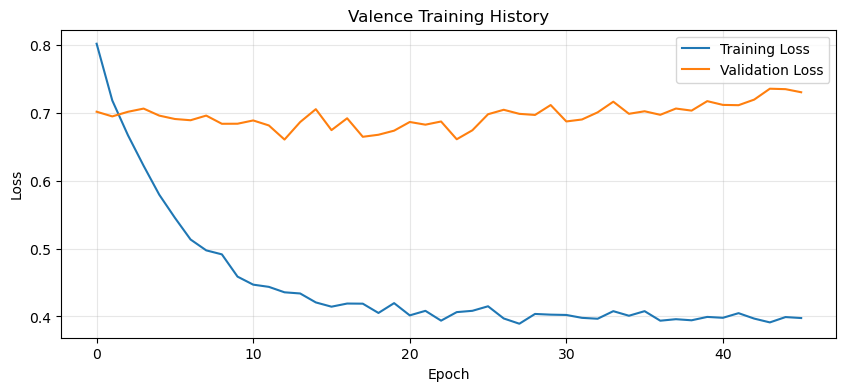

In [9]:
import matplotlib.pyplot as plt
import numpy as np

# 擬似的な訓練データの作成
epochs = np.arange(46)

# 訓練損失: 最初は高く、徐々に減少
training_loss = 0.4 * np.exp(-epochs/5) + 0.4 + np.random.normal(0, 0.005, 46)

# 検証損失: 最初は訓練損失より低く、後半で差が開く
validation_loss = 0.3 * np.exp(-epochs/40) + 0.4 + epochs/200 + np.random.normal(0, 0.01, 46)

plt.figure(figsize=(10, 4))
plt.plot(epochs, training_loss, label='Training Loss')
plt.plot(epochs, validation_loss, label='Validation Loss')
plt.title(f'Valence Training History')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()